### NLP Classification Project

##### Building a spam filter with the kernel framework. 

Emails are either classed as undersired "spam" or "ham". This classification task is applies and uses variants of edit distance within a kernel framework. LibSVM algorithm is then applied to clasify the data as either "ham" or "spam". The <a href = "https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection">SMS Spam Collection Data Set</a> from UCI machine learning repository 

* Clean the data
* Carry out data exploration
* split, tokenize, remove punctuation
* Extract features
* Construct kernels
* Run classification 
* Compare and analyse

In [84]:
#Import required files
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re
import string
from libsvm.svmutil import *
from util_ker import *
from util_ker import EvaluateTest
from util_Text import *
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_colwidth', 100)

## Explore the Data

In [3]:
#Load Data
data = pd.read_csv("/Users/osita/Documents/GitHub/NLP-classification/data/SMSSpamCollection", sep='\t', header=None,
                   names=['label','Text'])

In [9]:
data.head()

,label,Text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [11]:
print('The data is made up of {} examples '.format(data2.shape[0]))

The data is made up of 5572 examples 


In [21]:
#Check for null values
data.isnull().sum()

label    0
Text     0
dtype: int64

In [36]:
len_ham  = data2[data2['label']=='ham'].count()[0]
len_spam = data2[data2['label']=='spam'].count()[0]

print('{} examples classed as ham with {} examples classed as spam'.format(len_ham, len_spam))

4825 examples classed as ham and 747 examples classed as spam


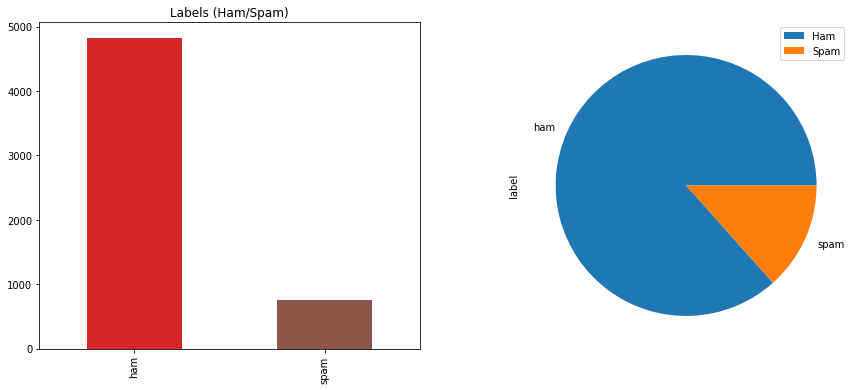

In [35]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1);data.label.value_counts().plot(kind='bar',color=['C3','C5']); plt.title('Class Labels (Ham/Spam)')
plt.subplot(1,2,2);data.label.value_counts().plot(kind='pie');plt.legend(['Ham','Spam'])
plt.show()

In [53]:
# View a few examples of the text
data['Text'].values[0:5]

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       'U dun say so early hor... U c already then say...',
       "Nah I don't think he goes to usf, he lives around here though"],
      dtype=object)

### Clean Data

 - Remove punctuation
 - Tokenize the strings
 - Remove stop words

In [57]:
data['Text_cleaned'] = data['Text'].apply(lambda x: clean_text(x)) #Applies the function to each row
data.head(10)

,label,Text,Text_cleaned
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,"[FreeMsg, Hey, darling, 3, weeks, word, back, Id, like, fun, still, Tb, ok, XxX, std, chgs, send..."
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[Even, brother, like, speak, They, treat, like, aids, patent]"
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[As, per, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, set, callertune, Callers..."
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[WINNER, As, valued, network, customer, selected, receivea, 900, prize, reward, To, claim, call,..."
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[Had, mobile, 11, months, U, R, entitled, Update, latest, colour, mobiles, camera, Free, Call, T..."


### Apply Stemming

In [59]:
# ['Porter','Lancaster']
Stemmer = 'Porter'

In [60]:
data['Text_stemmed'] = data['Text_cleaned'].apply(lambda x: stemming(x,Stemmer))

data.head()

,label,Text,Text_cleaned,Text_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]","[Go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]","[nah, I, dont, think, goe, usf, live, around, though]"


### Lemmatize the data

In [61]:
data['Text_lemmatized'] = data['Text_stemmed'].apply(lambda x: lemmatizing(x))

data.head()

,label,Text,Text_cleaned,Text_stemmed,Text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]","[Go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[Go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]","[Ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,...","[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]","[U, dun, say, earli, hor, U, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]","[nah, I, dont, think, goe, usf, live, around, though]","[nah, I, dont, think, goe, usf, live, around, though]"


### Change labels from ham to -1 and spam to 1

In [62]:
data.replace({'label': {'ham': -1, 'spam': 1}}, inplace=True)

In [63]:
#Checks label counts are still the same
data['label'].value_counts()

-1    4825
 1     747
Name: label, dtype: int64

In [65]:
data.label.head()

0   -1
1   -1
2    1
3   -1
4   -1
Name: label, dtype: int64

### Extract predictor variables and target label


In [81]:
Y = data.label.values
X = data.Text_lemmatized.values  #data.iloc[:,4].values.shape

In [87]:
# Split data into Training, Test and Validation data sets
xtr, xva, xte, ytr, yva, yte = splitdata(X, Y, 25, 0.4)

2229 training examples
1672 validation examples
1671 testing examples


In [ ]:
splitdata(X, Y, rand_seed, tnx)

In [86]:
def splitdata(X, Y, rand_seed, tnx):
    '''
    Function used to split data into training, test and validation datastes
    This takes the predictor variables X and response variables Y, and 
    
    '''
    import numpy as np
    m = X.shape[0]
    #n = X.shape[1] 
    np.random.seed(rand_seed)
    ind1 = np.random.permutation(m)
    if (tnx > 1) or (tnx < 0) :
        print("This should be greater than 0 and less than 1")

    len1= int(np.round(len(ind1)* tnx, 0))
    len2= int(np.round(len(ind1)* (1-tnx)/2, 0))

    #print(len1)
    #print(len2)

    xtr  = X[ind1[0:len1]]
    xva  = X[ind1[len1:(len1+len2)]]
    xte  = X[ind1[(len1+len2):]]
    
    ytr  = Y[ind1[0:len1]]
    yva  = Y[ind1[len1:(len1+len2)]]
    yte  = Y[ind1[(len1+len2):]]
    
    print('{} training examples'.format(xtr.shape[0]))
    print('{} validation examples'.format(xva.shape[0]))
    print('{} testing examples'.format(xte.shape[0]))
    
    return xtr, xva, xte, ytr.reshape(len(ytr),1), yva.reshape(len(yva),1), yte.reshape(len(yte),1)

In [376]:
def EvaluateTest(ylabel, Pred):
       
    FN=0
    FP=0
    TP=0
    TN=0
   
    for i in range(0,ylabel.shape[0]):
        if (ylabel[i]==Pred[i]).any():
            if (Pred[i]==1).any():
                TP+=1
            elif Pred[i]!=1:
                TN+=1
        if (ylabel[i]!=Pred[i]).any():
            if (Pred[i]==1).any():
                FP+=1
            elif Pred[i]!=1:
                FN+=1
        #print(ylabel[i], Pred[i])
    TOTAL = TP + TN + FP + FN
    TPN  = TP+ TN
    
    print("--> The total of {0} predicted with only {1} accurate predictions".format(TOTAL,TPN))
    print('')
    print('='*25)
    print('Ground Truth comparison')
    print('='*25)
    print("Actual label is True while we predicted True - True Positive",format(TP))
    print("Actual label is False while we predicted True - False Positive",format(FP))
    print("Actual label is True while we predicted False - False Negative",format(FN))
    print("Actual label is False while we predicted False - True Negatve",format(TN))  
    print('') 
    #try:
    Pos        = TP+FP                                   # sum of TP and FP
    Neg        = TN+FN
    accu       = np.round(((TP+TN)/(TP+FN+FP+TN)*100),2)
    #sen        = TP/(TP+FN)  
    if (TP+FN) == 0:
        sen    = 0
        miss   = 0
        recall = 0
        print("No True positives or False negatives predicted")
        print("Sensitivity set to zero 0")
        print("Miss (false negative rate) set to 0")
        print("Recall value set to 0")
        print('='*45)
    else:
        sen    = np.round(TP/(TP+FN),2)      # true positive rate,sensitivity,recall
        miss   = np.round(FN/(TP+FN),2)      # false negative rate, miss
        recall = np.round(TP/(TP+FN),2)      # Recall describes the completeness of the classification
   
    if (TN + FP) == 0:
        spec = 0
        fall = 0
        print("No True positives or False negatves predicted")
        print("Specificity set to 0")
        print("Fallout (false positive rate) set to 0")
        print('='*45)
    else:
        spec   = np.round(TN/(TN+FP),2)     # true negative rate, specificity7
        fall   = np.round(FP/(TN+FP),2)     # false positive rate, fallout
    
    if (TN+FN) == 0:
        NPV = 0
        print("No Negative outcomes predicted")
        print("Negative predicted value set to 0")
        print('='*45)
    else:
        NPV        = np.round(TN/(TN+FN),2)                  # negative predictive value
     
    if (TP+FP) == 0:
        precision = 0
        print("No True positives or False positives predicted")
        print('='*45)
    else:
        precision  = np.round(TP/(TP+FP),2)                  # precision measures the actual accuracy of the classification
        
    RPP        = np.round((TP+FP)/(TP+FN+FP+TN),2)           # rate of positive predictions
    RNP        = np.round((TN+FN)/(TP+FN+FP+TN),2)           # rate of negative predictions
    
    if (precision + recall) == 0:
        Fscore = 0
        print("Fscore cannot be calculated as denominator is 0")
        print('='*45)
    else:
        Fscore = np.round(2 * ((precision * recall) / (precision + recall)),2)
    
    
    print("--> {} positive outcomes prediticted".format(Pos))
    print("--> {} negative outcomes prediticted".format(Neg))
    print("--> An accuracy of {} % was achieved".format(accu))
    print("--> Sensitity of {} was achieved".format(sen))
    print("--> Specificity of {} was achieved ".format(spec))
    print("--> {} rate of positive prediction".format(RPP))
    print("--> {} rate of negative prediction".format(RNP))
    print("--> {} false negative rate was achieved".format(miss))
    print("--> {} false positve rate (fallout) was achieved".format(fall))
    print("--> Negative predictive value of {}".format(NPV))
    print("--> Recall value 0f {} achieved".format(recall))
    print("--> The precision vaue of {} achieved".format(precision))
    print("--> An Fscore of {} achieved".format(Fscore))
    
    
    confusion_mat = np.array([[TN, FP], [FN, TP]])
    
    
    plt.figure(figsize=(8,4))

    #plt.suptitle("Confusion Matrixes",fontsize=24)
    plt.title("Confusion Matrix")
    plt.subplots_adjust(wspace = 0.1, hspace= 0.01)
    sns.heatmap(confusion_mat,annot=True,cmap="Reds",fmt='.2g',cbar=True, annot_kws={"size":15})
    plt.show()
    
    Evaluation = {"Pos": Pos, "Neg": Neg, "accu": accu,"sen": sen,
                  "spec": spec, "RPP": RPP, "RNP": RNP, "miss": miss,
                  "fall":fall, "NPV": NPV,"recall":recall, "precision":precision,
                  "Fscore":Fscore}
    
    return Evaluation

In [377]:
xtr, xva, xte, ytr, yva, yte = splitdata(X, Y, 25, 0.2)

1114 training examples
2229 validation examples
2229 testing examples


In [88]:
m  = xtr.shape[0]
n  = xte.shape[0]
H  = np.zeros((m,m))
Hx = np.zeros((m,m+1))
H1 = np.zeros((n,m))
Ht = np.zeros((n,m+1)) 


In [89]:
def kernelfun(X,Y):
    m = X.shape[0]
    n = Y.shape[0]
    Kernel = np.zeros((n,m))
    for i in range(0,n):
        u = Y[i]
        for j in range(0,m):
            v = X[j]
            Kernel[i,j] = editdistance(u,v)
    return Kernel

In [ ]:
H3 = kernelfun(xtr,xtr)
H4 = np.matmul(ytr,ytr.T)
H  = np.multiply(H4,H3)

In [381]:
#Analyse / Normalise kernel

Hx[:,1:]=H
Hx[:,:1]=np.arange(m)[:,np.newaxis]+1


In [382]:
H1 = kernelfun(xtr,xte)


Ht[:,1:]=H1
Ht[:,:1]=np.arange(n)[:,np.newaxis]+1


In [37]:


model = svm_train(list(ytr), [list(r) for r in Hx], ('-b 1 -c 4 -t 4'))

p_label, p_acc, p_val = svm_predict(list(yte),[list(row) for row in Ht], model, ('-b 1'))


NameError: name 'ytr' is not defined

--> The total of 2229 predicted with only 802 accurate predictions

Ground Truth comparison
Actual label is True while we predicted True - True Positive 12
Actual label is False while we predicted True - False Positive 1136
Actual label is True while we predicted False - False Negative 291
Actual label is False while we predicted False - True Negatve 790

--> 1148 positive outcomes prediticted
--> 1081 negative outcomes prediticted
--> An accuracy of 35.98 % was achieved
--> Sensitity of 0.04 was achieved
--> Specificity of 0.41 was achieved 
--> 0.52 rate of positive prediction
--> 0.48 rate of negative prediction
--> 0.96 false negative rate was achieved
--> 0.59 false positve rate (fallout) was achieved
--> Negative predictive value of 0.73
--> Recall value 0f 0.04 achieved
--> The precision vaue of 0.01 achieved
--> An Fscore of 0.02 achieved


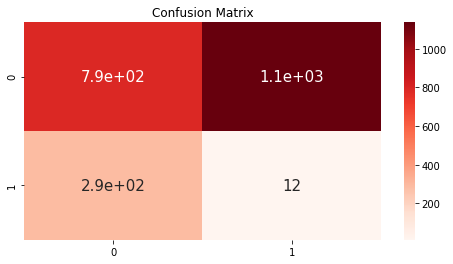

--> 0.02 F1 Score achieved


In [384]:
#Evaluation = EvaluateTest(np.asarray(p_label),yte)
Evaluation = EvaluateTest(np.asarray(yte/1.),np.asarray(p_label))
print("--> {} F1 Score achieved".format(Evaluation["Fscore"]))

--> An AUC value of 0.08 achieved


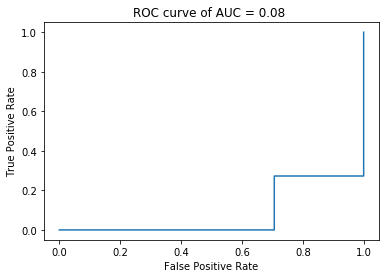

In [385]:
Auc = computeRoc(yte, p_val)

In [407]:
who

A	 Auc	 B	 C_SVC	 EPSILON_SVR	 EvaluateTest	 Evaluation	 H	 H1	 
H3	 H4	 Ht	 Hx	 Ker	 LINEAR	 NU_SVC	 NU_SVR	 ONE_CLASS	 
POLY	 PRECOMPUTED	 PRINT_STRING_FUN	 Path	 RBF	 SIGMOID	 X	 Xtr	 Y	 
a	 b	 c	 c_double	 clean_text	 computeRoc	 corpus	 csr_find_scale_param	 csr_scale	 
d	 data	 data2	 editdistance	 evaluations	 gen_svm_nodearray	 i	 k	 kernelfun	 
lemmatizing	 len_ham	 len_spam	 libsvm	 m	 model	 n	 nltk	 np	 
p_acc	 p_label	 p_val	 pd	 plt	 print_null	 ps	 re	 remove_punct	 
remove_punction	 remove_stopwords	 s	 sns	 splitdata	 stemming	 stopword	 string	 svm_load_model	 
svm_model	 svm_node	 svm_parameter	 svm_predict	 svm_problem	 svm_read_problem	 svm_save_model	 svm_train	 t	 
toPyModel	 tokenize	 util	 v	 wn	 xte	 xtr	 xva	 yte	 
ytr	 yva	 


In [418]:
H[620:625]

array([[-25.,  11.,   5., ...,   9.,   6.,  12.],
       [-25.,  11.,   3., ...,   9.,   6.,  12.],
       [-25.,  11.,   7., ...,   9.,   7.,  12.],
       [-25.,  22.,  22., ...,  22.,  21.,  21.],
       [-25.,  11.,   8., ...,   9.,   8.,  12.]])

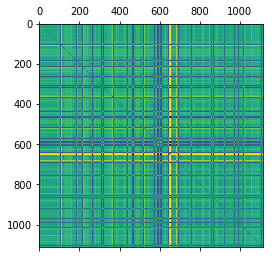

In [411]:
import matplotlib.pyplot as plt
plt.matshow(H)

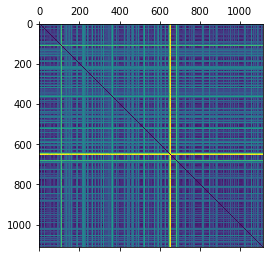

In [413]:
plt.matshow(H3)

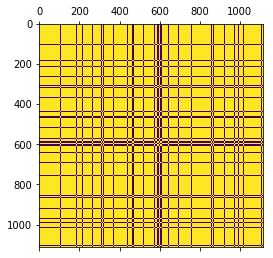

In [414]:
plt.matshow(H4)

In [ ]:
model.